# DIABETES CLASSIFICATION

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Files-main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
import warnings
warnings.filterwarnings('ignore')

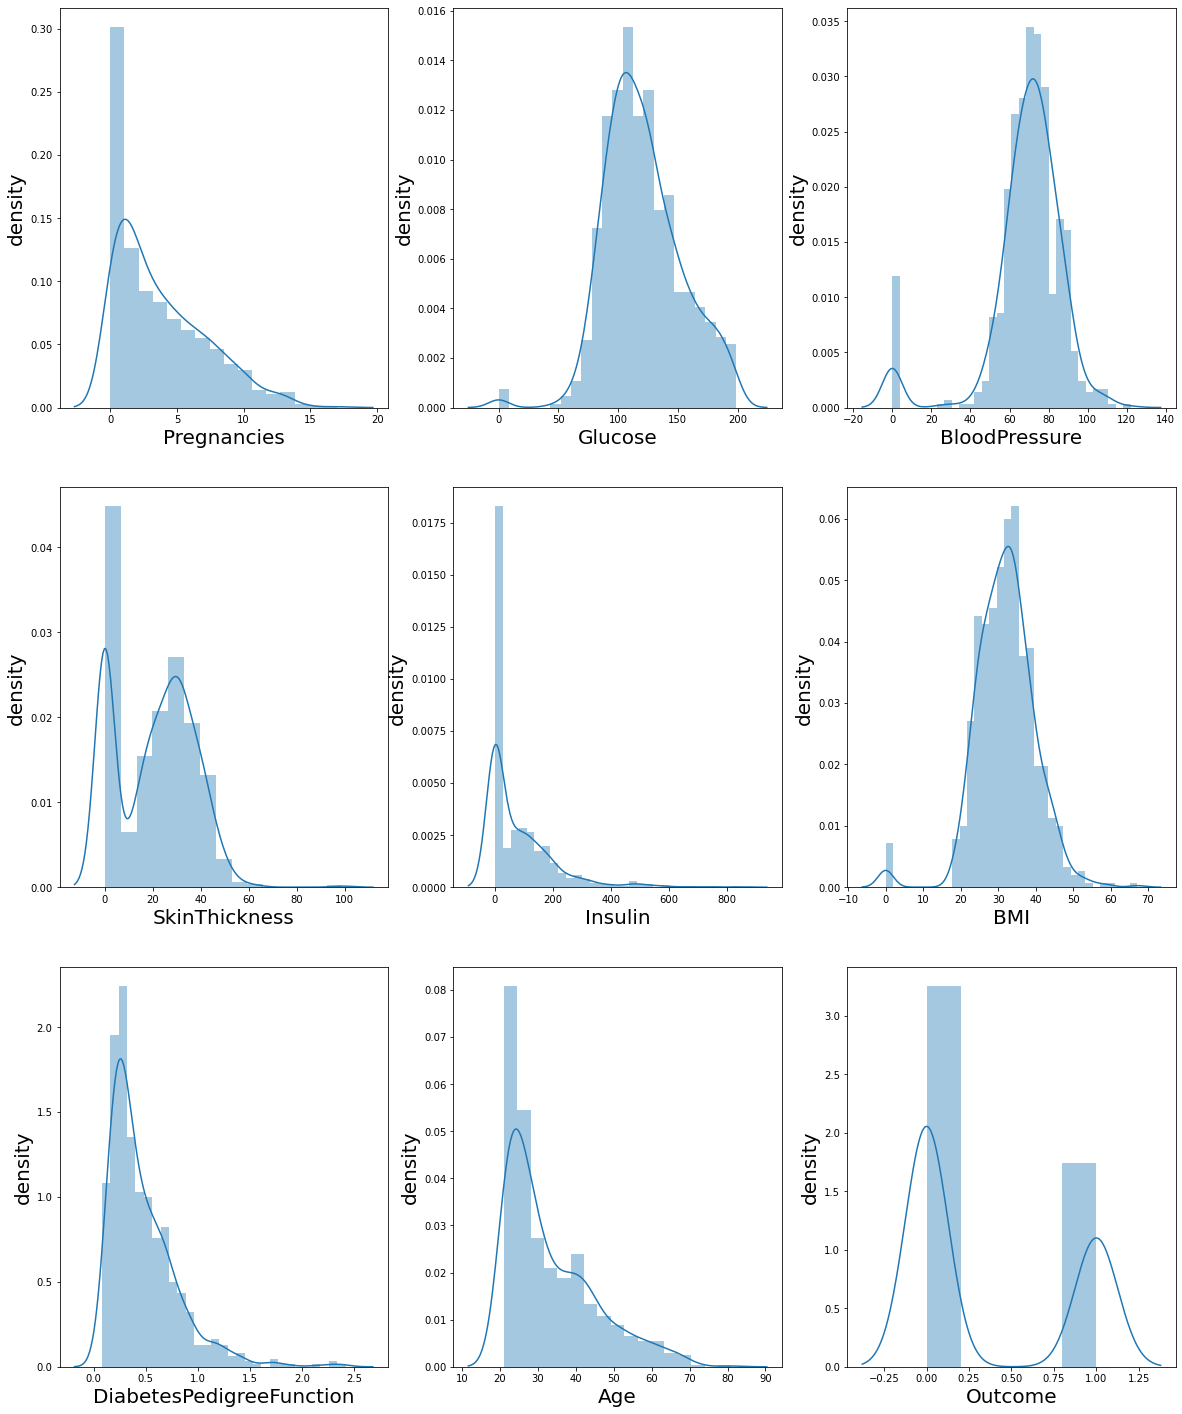

In [6]:
plt.figure(figsize=(20,25))
plotnumber = 1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('density',fontsize=20)
        
    plotnumber+=1
plt.show()

In [7]:
#dealing with 0s
df['BMI']= df['BMI'].replace(0,df['BMI'].mean())

df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())

df['SkinThickness']= df['SkinThickness'].replace(0,df['SkinThickness'].mean())

df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())

df['Insulin']= df['Insulin'].replace(0,df['Insulin'].mean())

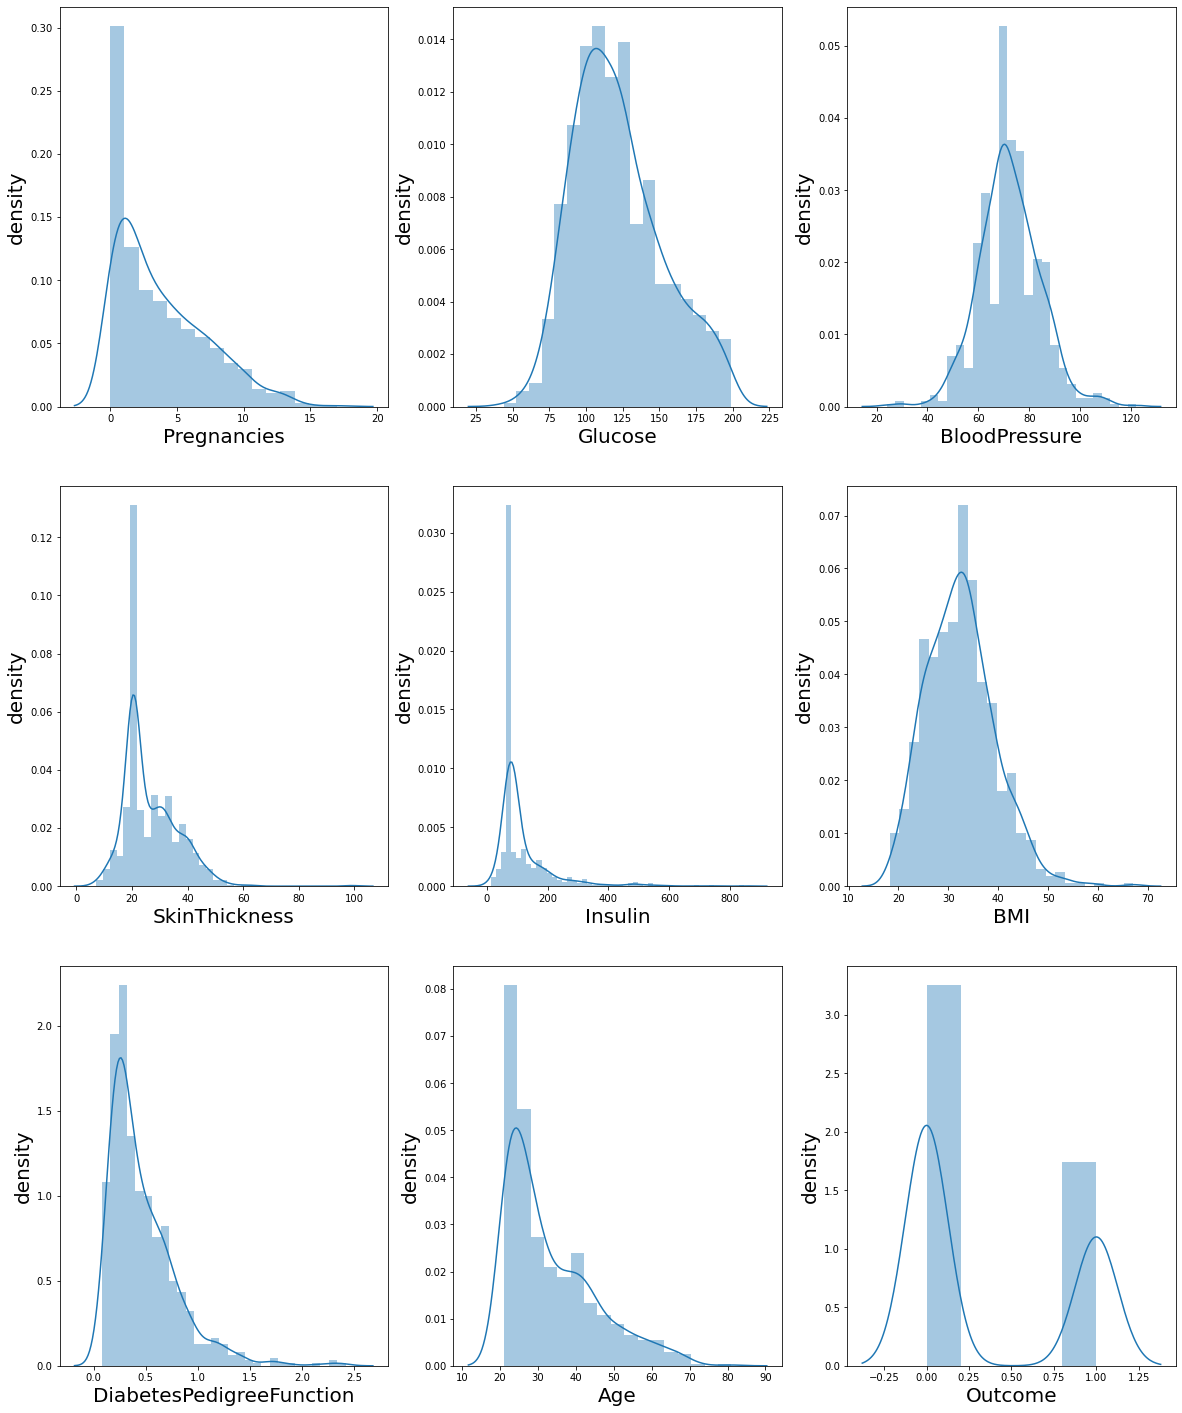

In [8]:
plt.figure(figsize=(20,25))
plotnumber = 1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('density',fontsize=20)
        
    plotnumber+=1
plt.show()

In [9]:
df_features= df.drop('Outcome', axis=1)

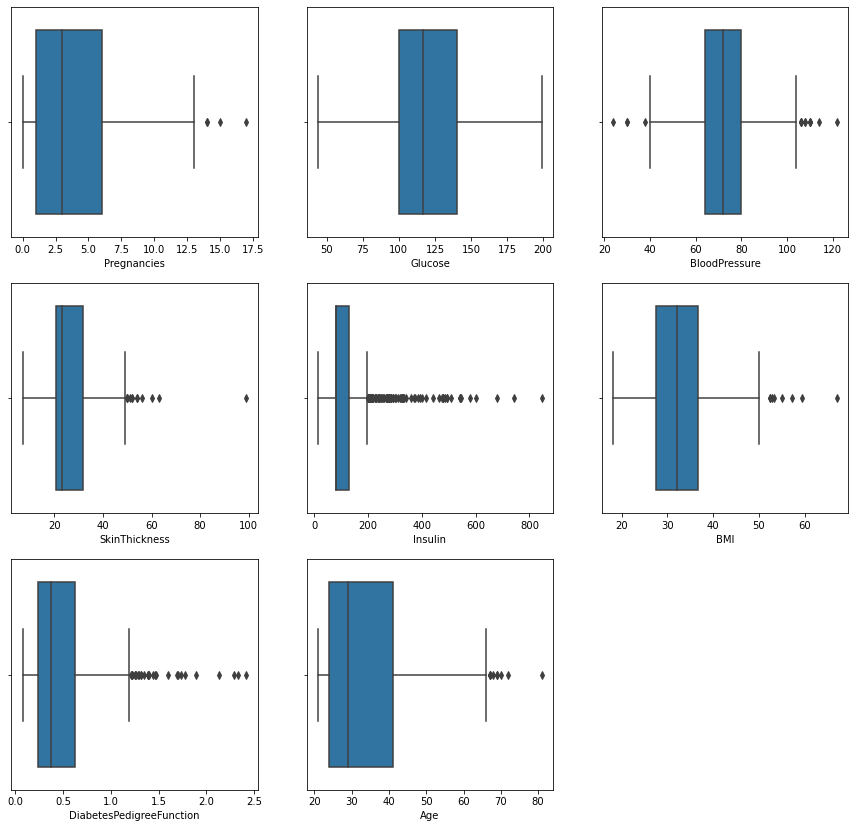

In [10]:
plt.figure(figsize=(15,50))
graph = 1
for column in df_features:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df_features[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [11]:
#determining the inner quantile range
Q3 = df.quantile(0.75)
Q1 = df.quantile(0.25)
IQR = Q3 - Q1

In [12]:
#correcting the outlier of one column
preg_high=(Q3.Pregnancies+(1.5*IQR.Pregnancies))
preg_high

13.5

In [13]:
index = np.where(df['Pregnancies']>preg_high)
index

(array([ 88, 159, 298, 455], dtype=int64),)

In [14]:
df = df.drop(df.index[index])

In [15]:
df.shape

(764, 9)

In [16]:
df.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [17]:
#working with outliers on the column Blood pressure
bp_high = (Q3.BloodPressure+(1.5*IQR.BloodPressure))
index= np.where(df['BloodPressure']> bp_high)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

(754, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [18]:
#validating for skin thickness
st_high = (Q3.SkinThickness+(1.5*IQR.SkinThickness))
index= np.where(df['SkinThickness']> st_high)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

(742, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
737,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
738,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
739,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
740,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [19]:

#validating for bmi thickness
st_high = (Q3.BMI+(1.5*IQR.BMI))
index= np.where(df['BMI']> st_high)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

(737, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
732,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
733,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
734,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
735,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [20]:

#validating for insulin thickness
ins_high = (Q3.Insulin+(1.5*IQR.Insulin))
index= np.where(df['Insulin']> ins_high)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

(654, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
649,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
650,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
651,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
652,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [21]:

#validating for diabetes pedigree func thickness
dpf_high = (Q3.DiabetesPedigreeFunction+(1.5*IQR.DiabetesPedigreeFunction))
index= np.where(df['DiabetesPedigreeFunction']> dpf_high)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

(631, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
626,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
627,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
628,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
629,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


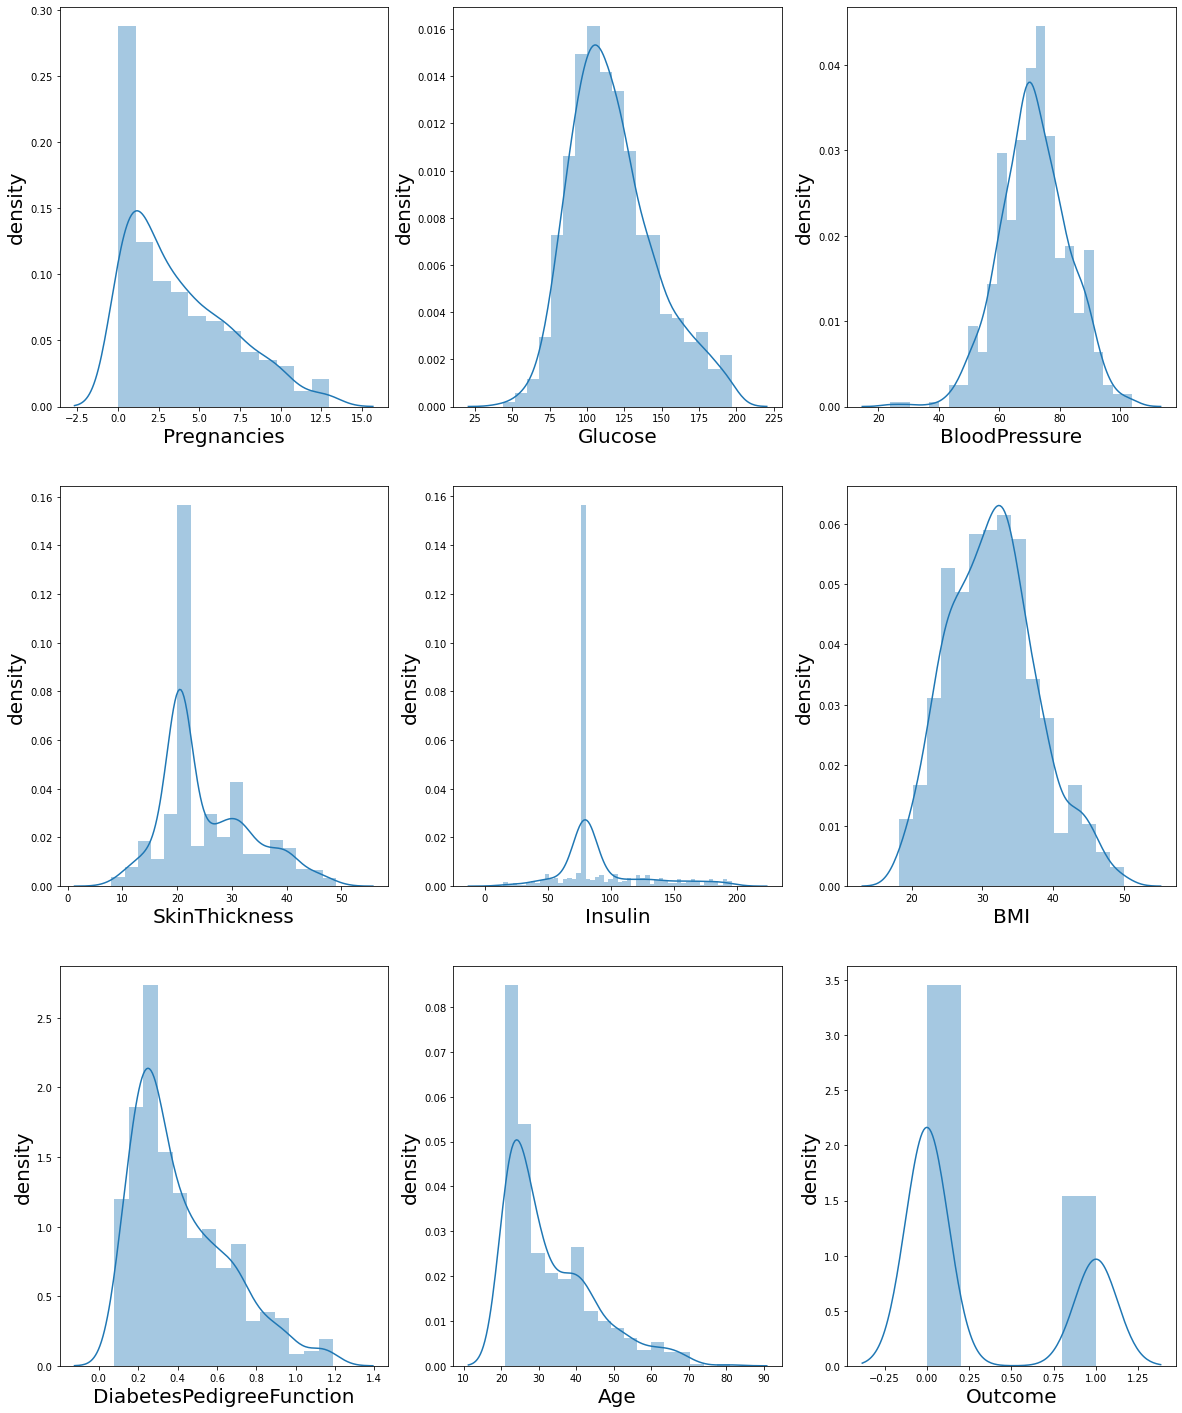

In [22]:
plt.figure(figsize=(20,25))
plotnumber = 1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('density',fontsize=20)
        
    plotnumber+=1
plt.show()

In [23]:
x = df.drop(columns=['Outcome'])
y=df['Outcome']

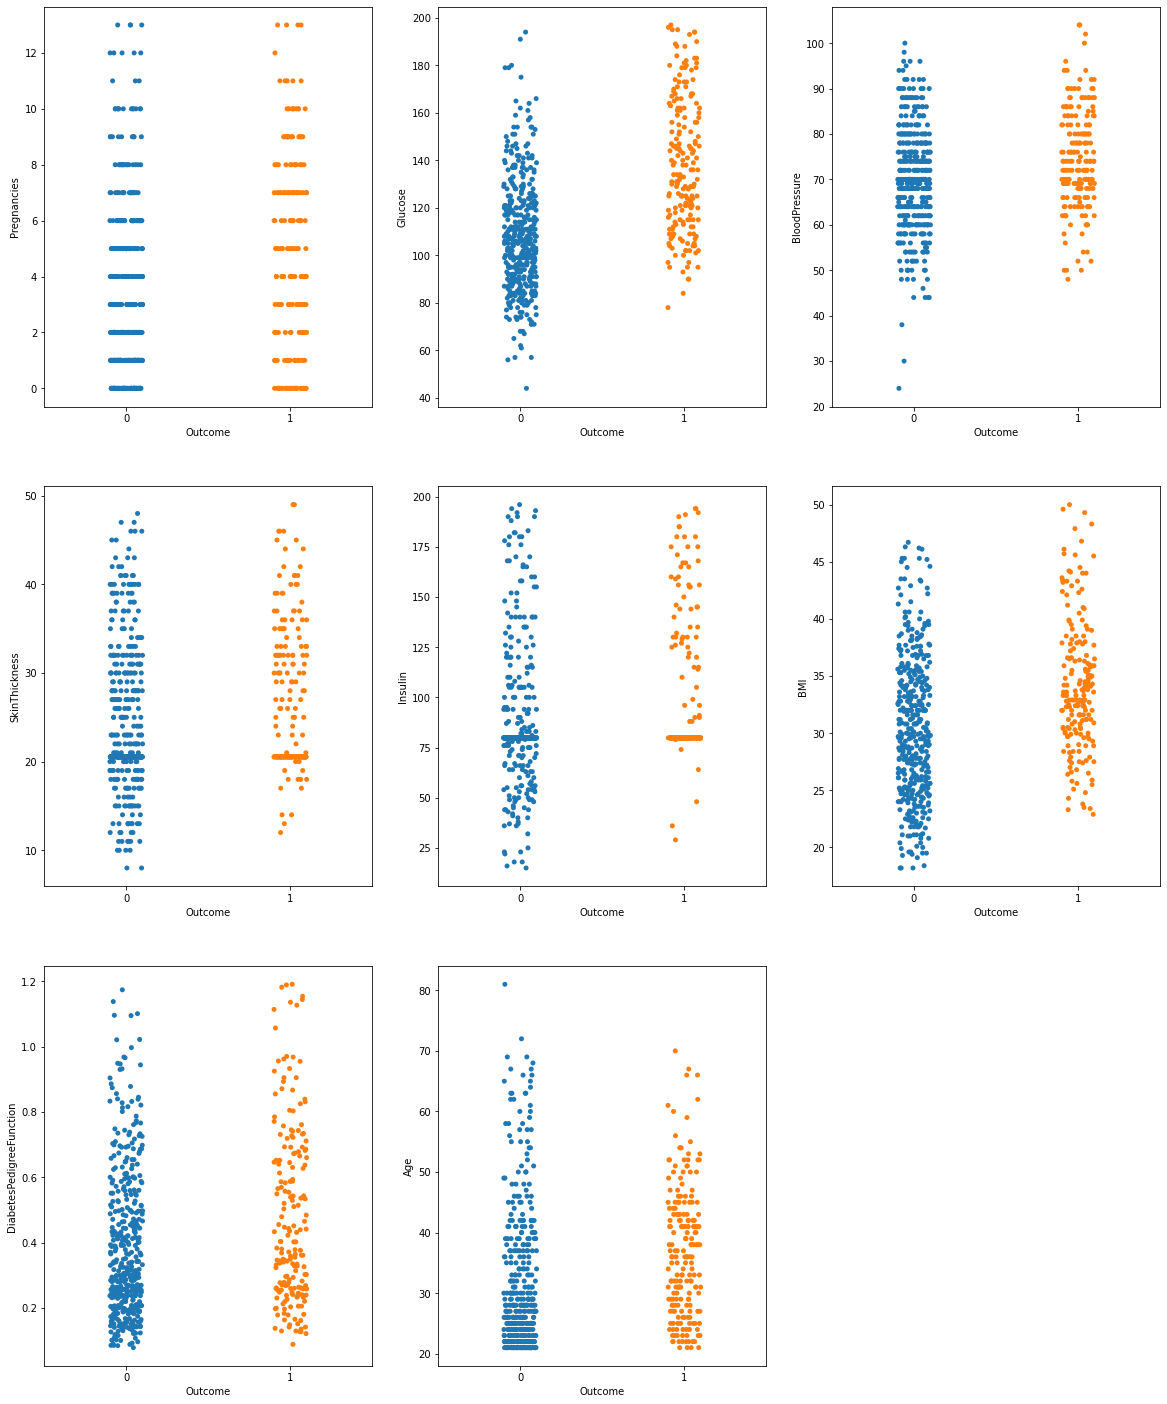

In [24]:
#finding the relationship between the features
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.show()

In [25]:
#multicollinearity using variance inflation factor
scalar = StandardScaler()
X_scaled =scalar.fit_transform(x)

In [26]:
X_scaled.shape[1]

8

In [27]:
vif= pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i)for i in range(X_scaled.shape[1])]
vif['features']=x.columns

vif

,vif,features
0,1.396033,Pregnancies
1,1.250111,Glucose
2,1.247999,BloodPressure
3,1.409933,SkinThickness
4,1.191874,Insulin
5,1.440890,BMI
6,1.035290,DiabetesPedigreeFunction
7,1.572207,Age


In [28]:
#if the vif score is less than 5, then there is no multicollinearity present

In [29]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=355)


In [30]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_pred=log_reg.predict(x_test)

In [32]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7911392405063291

In [33]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[95, 11],
       [22, 30]], dtype=int64)

In [36]:
#confusion matrix setup
true_positive = conf_mat[0][0]
false_positive= conf_mat[0][1]
false_negative= conf_mat[1][0]
true_negative= conf_mat[1][1]

In [37]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8962264150943396

In [38]:
recall = true_positive/(true_positive+false_negative)
recall

0.811965811965812

In [40]:
F1_score = 2*(recall*Precision)/(recall + Precision)
F1_score

0.852017937219731